# Questão 2 - Operação de Turbofan no Ponto de Projeto

![turbofan_termodynamic_scheme](images/turbofan.svg)

_Figura 1 - Modelo termodinâmico do motor turbofan e suas estações de análise._


In [77]:
# TODO: hide cell
import model_reference as mf
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

## a) Variação do BPR
Para situação de temperatura na saída da câmara de combustão de 1700 K, razão de compressão no compressor de 20, razão de pressão no fan de 1,4; varie a razão de passagem de zero (motor turbojato) até o máximo possível para estas condições de operação ao nível do mar e início da decolagem (Mach 0). 

* Em função da razão de passagem, apresente o comportamento do empuxo específico e consumo específico.

* Admitindo que a vazão de ar para o motor de razão de passagem igual zero (turbojato) é 100 kg/s, determine qual a vazão total de ar (total) e o consumo de combustível para as versões com razão de passagem diferente de zero de tal forma a propiciar o mesmo empuxo que a versão turbojato.

In [78]:
# TODO: hide cell
model_parameters = {
    # Atmospheric condition ##############################################
    'pa': 101.3, # [kPa]
    'ta': 288.3, # [K]
    'r': 288.3,  # [J/(kg*K)] Air Gas Constant
    # Components isentropic efficiencies #################################
    'n_d': 0.97,  # Difuser (Inlet)
    'n_f': 0.85,  # Fan
    'n_c': 0.85,  # High Pressure Compressor
    'n_b': 1.0,   # Combustion Chamber
    'n_t': 0.9,   # Compressor Turbine
    'n_tf': 0.9,  # Fan turbine
    'n_n': 0.98,  # Turbine Nozzle
    'n_nf': 0.98, # Fan Nozzle
    # Average air Cp/Cv inside each component ############################
    'gamma_d': 1.4,   # Difuser (Inlet)
    'gamma_f': 1.4,   # Fan
    'gamma_c': 1.37,  # High Pressure Compressor
    'gamma_b': 1.35,  # Combustion Chamber
    'gamma_t': 1.33,  # Compressor Turbine
    'gamma_tf': 1.33, # Fan turbine
    'gamma_n': 1.36,  # Turbine Nozzle
    'gamma_nf': 1.40, # Fan Nozzle
    # Engine parameters ##################################################
    'prc': 20,         # Crompressor Pressure Ratio
    'prf': 1.4,        # Fan Pressure Ratio
    'bypass_ratio': 0, # Initial value
    # Fuel parameters ####################################################
    'pc_fuel': 45000, # [kJ/kg] Heat of Combustion of the fuel
    'cp_fuel': 1.110, # [kJ/(kg*K)] Specific Heat in the combustion chamber
    # Operating Conditions ###############################################
    't04': 1700,        # [K] Combustion Chamber Temperature
    'mach': 0.0,        # Aircraft Mach number
    'mass_flow': 100.0, # [kg/s] Inlet mass flow
    }

summarise_target = [
    'n1',
    'u_s',
    'p06',
    'hot_mass_flow',
    'hot_specific_thrust',
    'cold_mass_flow',
    'cold_specific_thrust',
    'bypass_ratio', 
    'TSFC',
    'thrust_total',
    'specific_thrust',
    ]

# 2a) PART 1 ###################################################################

results = pd.DataFrame()
results.index = results.index.set_names('bpr')

ratios = np.concatenate((np.arange(0, 10, 1), np.arange(10, 10.6, 0.2), np.arange(10.6, 10.9, 0.02)))
for bpr in ratios:
    model_parameters["bypass_ratio"] = bpr
    turbofan = mf.TurboFan(model_parameters)

    results[bpr] = (
        turbofan.sumarise().
        append(turbofan.sumarise_results()).
        loc[summarise_target]
        )

# print(results[results.columns[::3]].to_markdown())
# results[results.columns[::3]]

| bpr                  |         0.0 |         3.0 |          6.0 |           9.0 |   10.4 |   10.64 |   10.70 |   10.76 |   10.82 |   10.88 |
|:---------------------|------------:|------------:|-------------:|--------------:|---------------------:|---------------------:|---------------------:|---------------------:|---------------------:|---------------------:|
| n1                   |   1         |   1         |    1         |    1          |           1          |           1          |            1         |           1          |           1          |           1          |
| u_s                  | 964.221     | 825.73      |  654.297     |  407.807      |         201.079      |         136.259      |          114.393     |          87.1736     |          45.9008     |         0          |
| p06                  | 563.401     | 375.232     |  238.761     |  143.479      |         110.448      |         105.418      |          104.188     |         102.969      |         101.76       |         100.563      |
| hot_mass_flow        |  99.9233    |  24.9808    |   14.2748    |    9.99233    |           8.7652     |           8.58448    |            8.54045   |           8.49688    |           8.45375    |           8.41105    |
| hot_specific_thrust  | 986.682     | 844.965     |  669.539     |  417.306      |         205.763      |         139.433      |          117.058     |          89.2043     |          46.97       |          0          |
| cold_mass_flow       |   0         |  74.9425    |   85.6486    |   89.931      |          91.1581     |          91.3388     |           91.3829    |          91.4264     |          91.4696     |          91.5123     |
| cold_specific_thrust |   0         | 725.394     | 1450.79      | 2176.18       |        2514.7        |        2572.73       |         2587.24      |        2601.75       |        2616.26       |        2630.76       |
| bypass_ratio         |   0         |   3         |    6         |    9          |          10.4        |          10.64       |           10.7       |          10.76       |          10.82       |          10.88       |
| TSFC                 |   0.0236087 |   0.0148337 |    0.0109862 |    0.00898183 |           0.00856261 |           0.00858881 |            0.0086138 |           0.00865652 |           0.00874664 |           0.00885457 |
| thrust_total         |  98.5925    |  39.2289    |   30.2672    |   25.915      |          23.8454     |          23.2825     |           23.0959    |          22.8647     |          22.5142     |          22.1275     |
| specific_thrust      |   0.986682  |   1.57036   |    2.12033   |    2.59349    |           2.72046    |           2.71216    |            2.7043    |           2.69095    |           2.66323    |           2.63076    |

Razão de passagem máxima: 10.84


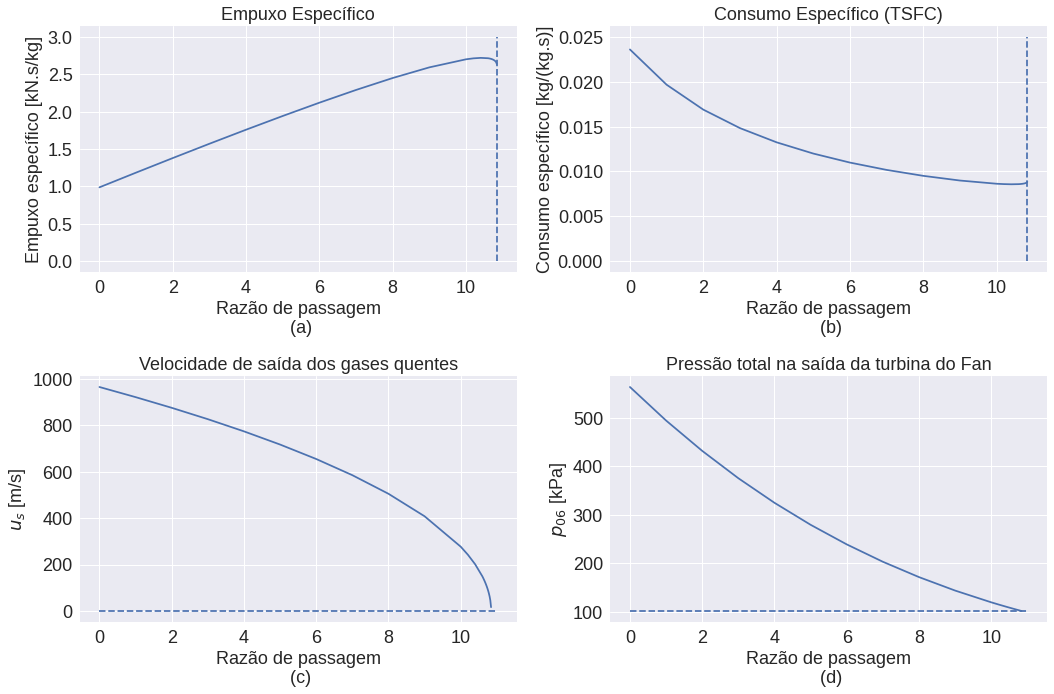

In [79]:
# TODO: hide input
fs=18
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
bpr_limit = results.T['u_s'].dropna().idxmin()

plt.sca(ax[0,0])
plt.plot(results.loc['specific_thrust',0:bpr_limit])
plt.title('Empuxo Específico', fontsize=fs)
plt.xlabel('Razão de passagem\n (a)', fontsize=fs)
plt.ylabel('Empuxo específico [kN.s/kg]', fontsize=fs)
plt.vlines(x=bpr_limit, ymin=0, ymax=3, linestyles='--')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.sca(ax[0,1])
plt.plot(results.loc['TSFC',0:bpr_limit])
plt.title('Consumo Específico (TSFC)', fontsize=fs)
plt.xlabel('Razão de passagem\n (b)', fontsize=fs)
plt.ylabel('Consumo específico [kg/(kg.s)]', fontsize=fs)
plt.vlines(x=bpr_limit, ymin=0, ymax=0.025, linestyles='--')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.sca(ax[1,0])
plt.plot(results.loc['u_s',0:bpr_limit])
plt.title('Velocidade de saída dos gases quentes', fontsize=fs)
plt.xlabel('Razão de passagem\n (c)', fontsize=fs)
plt.ylabel('$u_s$ [m/s]', fontsize=fs)
plt.hlines(y=0, xmin=0, xmax=11, linestyles='--')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.sca(ax[1,1])
plt.plot(results.loc['p06',0:bpr_limit])
plt.title('Pressão total na saída da turbina do Fan', fontsize=fs)
plt.xlabel('Razão de passagem\n (d)', fontsize=fs)
plt.ylabel('$p_{06}$ [kPa]', fontsize=fs)
plt.hlines(y=model_parameters['pa'], xmin=0, xmax=11, linestyles='--')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout(pad=2.0)
plt.savefig("images/questao2/questao2_fig1.jpg", dpi=800)

print(f"Razão de passagem máxima: {bpr_limit:0.2f}")

Partindo de um tubofan de razão de passagem ($B$) igual a zero (técnicamente, um turbojato), quando aumentamos o valor de $B$ passamos a absorver a energia do escoamento pós turbina do compressor (HPT) utilizando a turbina do fan (LPT). A medida que a razão de passagem aumenta, a vazão mássica no gerador de gás ($\dot{m}_H$) permanece constante, mas a potência gerada não é utilizada apenas para acelerar os gases nos bacal quente, mas também para comprimir o ar no fan. Há, portanto, um limite energético de quanto ar frio ($\dot{m}_C$) o fan consegue comprimir, que implica em uma limitação na razão de passagem $B$.

Na figura acima, o gráfico (d) mostra que a pressão total na saída da turbina do fan ($p_{06}$) decresce monotonicamente com o aumento da razão de passagem até se igualar a pressão ambiente quando $B=10.84$. A partir deste valor, o modelo nos mostra que a pressão cairia abaixo da pressão atmosférica, o que faria o escoamento na turbina ir contra o gradiente de pressão. Na prática, isso não ocorre, e o que o modelo nos diz, na verdade, é que não é possível operar com a razão de passagem superior a $B=10.84$. Da mesma maneira, o gráfico (c) mostra a evolução da velocidade de saída dos gases quentes, que descresce monotonicamente até atingir o vor de zero para o memo limite, o que nos leva às mesmas conclusões do gráfico (c).

Os gráficos (a) e (b) da figura acima nos mostram o empuxo específico e o consumo especícifico até o valor limite da razão de passagem, respectivamente. Os dois gráficos nos dizem que a eficiência do motor cresce com a razão de passagem, tanto do ponto de vista do consumo quanto do empuxo específico.

In [80]:
# TODO: hide cell
# 2a) PART 2 ###################################################################
"""
1. vazão total de ar (total)
2. consumo de combustível 

para as versões com razão de passagem diferente de zero de tal forma a propiciar o
!! mesmo empuxo que a versão turbojato !!
"""

results_2 = pd.DataFrame()
results_2.index = results_2.index.set_names('bpr')

model_parameters["bypass_ratio"] = 0 # Turbojet configuration
model_parameters['mass_flow'] = 100 # [kg/s] initial value
tubojet = mf.TurboFan(model_parameters)
turbojet_thrust = float(tubojet.sumarise_results().loc['thrust_total'])

summarise_target_2 = [
    'fuel_consumption',
    'thrust_total',
    'TSFC',
    'mass_flow'
]

step=0.25
for bpr in np.arange(0, bpr_limit+step, step):
    model_parameters["bypass_ratio"] = bpr
    inlet_mass_flow = 100 # [kg/s]
    tol = 1e-5
    diff = 1.0
    while abs(diff) > tol:
        model_parameters["mass_flow"] = inlet_mass_flow
        turbofan = mf.TurboFan(model_parameters)

        turbofan_thrust = float(turbofan.sumarise_results().loc['thrust_total'])
        diff = (turbofan_thrust - turbojet_thrust)/turbojet_thrust
        inlet_mass_flow = inlet_mass_flow - 100*diff # Update mass flow (increase if thrust is lower)

    results_2[bpr] = (
        turbofan.sumarise().
        append(turbofan.sumarise_results()).
        loc[summarise_target_2]
        )

# print(results_2[results_2.columns[::4]].to_markdown())

| bpr              |        0.0 |         1.0 |         2.0 |         3.0 |         4.0 |         5.0 |         6.0 |         7.0 |          8.0 |          9.0 |         10.0 |         11.0 |
|:-----------------|-----------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|-------------:|-------------:|-------------:|-------------:|
| fuel_consumption |  2.32764   |   1.93985   |   1.66588   |   1.46248   |   1.30601   |   1.18246   |   1.08315   |   1.00249   |   0.9371     |   0.885533   |   0.850178   |   0.863463   |
| thrust_total     | 98.5925    |  98.5919    |  98.5919    |  98.5917    |  98.5919    |  98.5916    |  98.5917    |  98.5917    |  98.5916     |  98.5916     |  98.5917     |  98.5917     |
| TSFC             |  0.0236087 |   0.0196756 |   0.0168967 |   0.0148337 |   0.0132466 |   0.0119935 |   0.0109862 |   0.0101681 |   0.00950487 |   0.00898183 |   0.00862322 |   0.00875797 |
| mass_flow        | 99.9233    | 166.552     | 214.544     | 251.132     | 280.328     | 304.572     | 325.488     | 344.288     | 362.059      | 380.15       | 401.47       | 444.812      |

Emputo total do turbojato: 98.59 kN


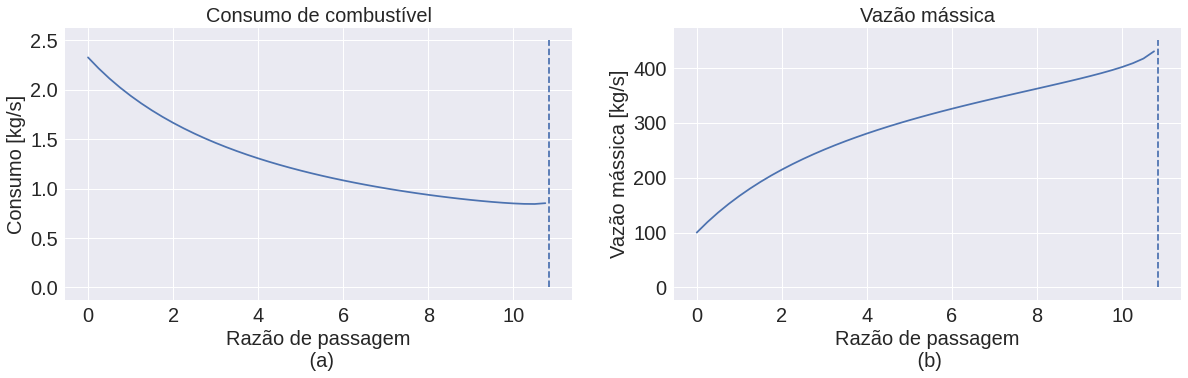

In [81]:
# TODO: hide input
fs=20
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
bpr_limit = results.T['u_s'].dropna().idxmin()

plt.sca(ax[0])
plt.plot(results_2.loc['fuel_consumption',0:bpr_limit])
plt.title('Consumo de combustível',fontsize=fs)
plt.xlabel('Razão de passagem\n (a)',fontsize=fs)
plt.ylabel('Consumo [kg/s]',fontsize=fs)
plt.vlines(x=bpr_limit, ymin=0, ymax=2.5, linestyles='--')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.sca(ax[1])
plt.plot(results_2.loc['mass_flow',0:bpr_limit])
plt.title('Vazão mássica',fontsize=fs)
plt.xlabel('Razão de passagem\n (b)',fontsize=fs)
plt.ylabel('Vazão mássica [kg/s]',fontsize=fs)
plt.vlines(x=bpr_limit, ymin=0, ymax=450, linestyles='--')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.savefig("images/questao2/questao2_fig2.jpg", dpi=1000)

print(f"Emputo total do turbojato: {turbojet_thrust:0.2f} kN")

Nesta parte do estudo, estamos interessados em fazer com que o motor turbofan apresente o mesmo empuxo total $T$ que a versão turbojato, que foi calculado pelo modelo como $T=98.59\;kN$. Então, para cada possível valor da razão de passagem $0 \leq B \leq 10.84$, o valor da vazão mássica foi alterado até que se atingisse o mesmo empuxo total que o turbojato. Os valores obtidos podem ser vistos na tabela resumida ou na figura acima.

O gráfico (a) da figura acima mostra que para produzir o mesmo empuxo, um motor turbofan sempre é mais econômico. Porém, como mostra a figura (b), para produzir o mesmo empuxo, a vazão mássica deve aumentar significativamente, possivelmente atingindo valores que apresentam desafios tecnológicos e geométricos para ser implementado.

## b) Combustion Chamber Temperature

In [82]:
model_parameters = {
    # Atmospheric condition ##############################################
    'pa': 101.3, # [kPa]
    'ta': 288.3, # [K]
    'r': 288.3,  # [J/(kg*K)] Air Gas Constant
    # Components isentropic efficiencies #################################
    'n_d': 0.97,  # Difuser (Inlet)
    'n_f': 0.85,  # Fan
    'n_c': 0.85,  # High Pressure Compressor
    'n_b': 1.0,   # Combustion Chamber
    'n_t': 0.9,   # Compressor Turbine
    'n_tf': 0.9,  # Fan turbine
    'n_n': 0.98,  # Turbine Nozzle
    'n_nf': 0.98, # Fan Nozzle
    # Average air Cp/Cv inside each component ############################
    'gamma_d': 1.4,   # Difuser (Inlet)
    'gamma_f': 1.4,   # Fan
    'gamma_c': 1.37,  # High Pressure Compressor
    'gamma_b': 1.35,  # Combustion Chamber
    'gamma_t': 1.33,  # Compressor Turbine
    'gamma_tf': 1.33, # Fan turbine
    'gamma_n': 1.36,  # Turbine Nozzle
    'gamma_nf': 1.40, # Fan Nozzle
    # Engine parameters ##################################################
    'prc': 20,         # Crompressor Pressure Ratio
    'prf': 1.4,        # Fan Pressure Ratio
    'bypass_ratio': 0, # Initial value
    # Fuel parameters ####################################################
    'pc_fuel': 45000, # [kJ/kg] Heat of Combustion of the fuel
    'cp_fuel': 1.110, # [kJ/(kg*K)] Specific Heat in the combustion chamber
    # Operating Conditions ###############################################
    't04': 1700,        # [K] (Combustion Chamber Temperature)
    'mach': 0.0,        # Aircraft speed
    'mass_flow': 100.0, # [kg/s] Inlet mass flow
    }

summarise_target = [
    'n1',
    'u_s',
    'hot_mass_flow',
    'hot_specific_thrust',
    'cold_mass_flow',
    'cold_specific_thrust',
    'bypass_ratio', 
    'TSFC',
    'thrust_total',
    'specific_thrust',
    ]

In [83]:
def findMaximumBypassRatio(model_parameters, restriction, restriction_value):
    # parameters = dict(model_parameters)
    # parameters[restriction] = restriction_value
    model_parameters[restriction] = restriction_value

    results = pd.DataFrame()
    results.index = results.index.set_names('bpr')

    ratios = np.concatenate((np.arange(0, 15, 0.1), np.arange(10, 10.6, 0.2), np.arange(10.6, 10.9, 0.02)))
    for bpr in ratios:
        model_parameters["bypass_ratio"] = bpr
        turbofan = mf.TurboFan(model_parameters)

        results[bpr] = (
            turbofan.sumarise().
            append(turbofan.sumarise_results()).
            loc[summarise_target]
            )

    bpr_limit = results.T['u_s'].dropna().idxmin()

    specific_thrust_limit = results.T['specific_thrust'][bpr_limit]
    TSFC_limit = results.T['TSFC'][bpr_limit]

    # specific_thrust_limit = results.T['specific_thrust'].dropna().iloc[-1]
    # TSFC_limit = results.T['TSFC'].dropna().iloc[-1]

    return bpr_limit, specific_thrust_limit, TSFC_limit

In [84]:
# PART 3 ###################################################################
# Varying T04 - Combustion chamber temperature from 1700 K downwards:


results_b = pd.DataFrame()
results_b.index = results_b.index.set_names('t04')

temp_values = np.arange(1700, 999, -20)
print(temp_values)

T04 = [] # combustion chamber temperature
BPR = [] # bypass ratio
FS = [] # specific thrust
TSFC = [] # thrust specific fuel consumption

for t04 in temp_values:
    # model_parameters["t04"] = t04
    # turbofan = mf.TurboFan(model_parameters)

    restriction = "t04"
    restriction_value = t04

    bpr_limit, specific_thrust_limit, TSFC_limit = findMaximumBypassRatio(model_parameters, restriction, restriction_value)

    T04.append(t04)
    BPR.append(bpr_limit)
    FS.append(specific_thrust_limit)
    TSFC.append(TSFC_limit)

    print("{}: {} | bpr_limit: {:5.2f} | specific_thrust: {:.5f} | TSFC: {:.5f}".format(restriction, restriction_value, bpr_limit, specific_thrust_limit, TSFC_limit))

    # results_b[t04] = (
    #     turbofan.sumarise().
    #     append(turbofan.sumarise_results()).
    #     loc[summarise_target]
    #     )


results_b

[1700 1675 1650 1625 1600 1575 1550 1525 1500 1475 1450 1425 1400 1375
 1350 1325 1300 1275 1250 1225 1200 1175 1150 1125 1100 1075 1050 1025
 1000]
t04: 1700 | bpr_limit: 10.84 | specific_thrust: 2.63805 | TSFC: 0.00883
t04: 1675 | bpr_limit: 10.40 | specific_thrust: 2.59494 | TSFC: 0.00872
t04: 1650 | bpr_limit: 10.00 | specific_thrust: 2.51134 | TSFC: 0.00875
t04: 1625 | bpr_limit:  9.70 | specific_thrust: 2.38338 | TSFC: 0.00895
t04: 1600 | bpr_limit:  9.30 | specific_thrust: 2.30927 | TSFC: 0.00895
t04: 1575 | bpr_limit:  8.90 | specific_thrust: 2.22849 | TSFC: 0.00898
t04: 1550 | bpr_limit:  8.50 | specific_thrust: 2.14467 | TSFC: 0.00903
t04: 1525 | bpr_limit:  8.20 | specific_thrust: 2.00838 | TSFC: 0.00931
t04: 1500 | bpr_limit:  7.80 | specific_thrust: 1.93826 | TSFC: 0.00931
t04: 1475 | bpr_limit:  7.40 | specific_thrust: 1.85822 | TSFC: 0.00936
t04: 1450 | bpr_limit:  7.00 | specific_thrust: 1.77452 | TSFC: 0.00944
t04: 1425 | bpr_limit:  6.60 | specific_thrust: 1.68871 | T

""
t04


Temperatura de saída da câmara mínima: 1000


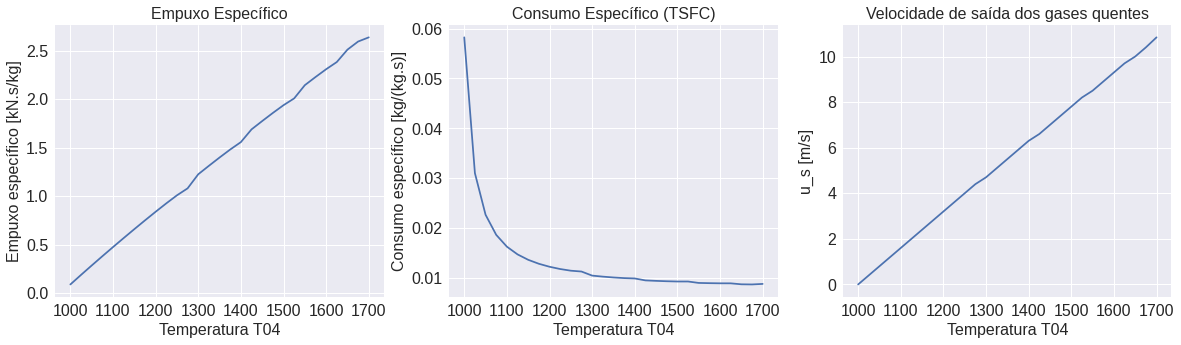

In [85]:
fs = 16
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
# t04_limit = results_b.T['u_s'].dropna().idxmin()

plt.sca(ax[0])
# plt.plot(results_b.loc['specific_thrust',:])
plt.plot(T04, FS)
plt.title('Empuxo Específico', fontsize=fs)
plt.xlabel('Temperatura T04', fontsize=fs)
plt.ylabel('Empuxo específico [kN.s/kg]', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
# plt.vlines(x=t04_limit, ymin=0, ymax=3, linestyles='--')

plt.sca(ax[1])
# plt.plot(results_b.loc['TSFC',:])
plt.plot(T04, TSFC)
plt.title('Consumo Específico (TSFC)', fontsize=fs)
plt.xlabel('Temperatura T04', fontsize=fs)
plt.ylabel('Consumo específico [kg/(kg.s)]', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
# plt.vlines(x=t04_limit, ymin=0, ymax=0.025, linestyles='--')

plt.sca(ax[2])
# plt.plot(results_b.loc['u_s',:])
plt.plot(T04, BPR)
plt.title('Velocidade de saída dos gases quentes', fontsize=fs)
plt.xlabel('Temperatura T04', fontsize=fs)
plt.ylabel('u_s [m/s]', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
# plt.hlines(y=0, xmin=0, xmax=15, linestyles='--')
plt.savefig("images/questao2/fig2b1.jpg", dpi=1000)

# print(f"Temperatura de saída da câmara mínima: {t04_limit:0.2f}")
print(f"Temperatura de saída da câmara mínima: {min(T04)}")

## c) Variação de PRF - Fan Pressure Ratio

Partindo a configuração inicial de motor turbofan: temperatura na saída da câmara de combustão de 1700 K, razão de compressão no compressor de 20, razão de pressão no fan de 1,4 e razão de passagem 5. Para operação ao nível do mar e início da decolagem (Mach 0), 

* Primeiramente verifique se para esta configuração seria possível aumentar a razão de passagem, mantendo todas as outras condições. 
* Depois diminua gradativamente a razão de pressão do compressor e encontre novamente a máxima razão de passagem para cada razão de compressão. Apresente a relação entre a razão de compressão do compressor e a razão de passagem, empuxo específico e consumo especifico.

In [86]:
model_parameters = {
    # Atmospheric condition ##############################################
    'pa': 101.3, # [kPa]
    'ta': 288.3, # [K]
    'r': 288.3,  # [J/(kg*K)] Air Gas Constant
    # Components isentropic efficiencies #################################
    'n_d': 0.97,  # Difuser (Inlet)
    'n_f': 0.85,  # Fan
    'n_c': 0.85,  # High Pressure Compressor
    'n_b': 1.0,   # Combustion Chamber
    'n_t': 0.9,   # Compressor Turbine
    'n_tf': 0.9,  # Fan turbine
    'n_n': 0.98,  # Turbine Nozzle
    'n_nf': 0.98, # Fan Nozzle
    # Average air Cp/Cv inside each component ############################
    'gamma_d': 1.4,   # Difuser (Inlet)
    'gamma_f': 1.4,   # Fan
    'gamma_c': 1.37,  # High Pressure Compressor
    'gamma_b': 1.35,  # Combustion Chamber
    'gamma_t': 1.33,  # Compressor Turbine
    'gamma_tf': 1.33, # Fan turbine
    'gamma_n': 1.36,  # Turbine Nozzle
    'gamma_nf': 1.40, # Fan Nozzle
    # Engine parameters ##################################################
    'prc': 20,         # Crompressor Pressure Ratio
    'prf': 1.4,        # Fan Pressure Ratio
    'bypass_ratio': 5, # Initial value
    # Fuel parameters ####################################################
    'pc_fuel': 45000, # [kJ/kg] Heat of Combustion of the fuel
    'cp_fuel': 1.110, # [kJ/(kg*K)] Specific Heat in the combustion chamber
    # Operating Conditions ###############################################
    't04': 1700,        # [K] (Combustion Chamber Temperature)
    'mach': 0.0,        # Aircraft speed
    'mass_flow': 100.0, # [kg/s] Inlet mass flow
    }

summarise_target = [
    'n1',
    'u_s',
    'hot_mass_flow',
    'hot_specific_thrust',
    'cold_mass_flow',
    'cold_specific_thrust',
    'bypass_ratio', 
    'TSFC',
    'thrust_total',
    'specific_thrust',
    ]

In [88]:
# PART 4 ###################################################################


results_c2 = pd.DataFrame()
results_c2.index = results_c2.index.set_names('prf')

# temp_values = np.arange(1700, 999, -50)
prf_values = np.arange(1.4, 1.05, -0.01)
print(prf_values)

PRF = [] # PRF
BPR = [] # bypass ratio
FS = [] # specific thrust
TSFC = [] # thrust specific fuel consumption

for prf in prf_values:
    # model_parameters["t04"] = t04
    # turbofan = mf.TurboFan(model_parameters)

    restriction = "prf"
    restriction_value = prf

    bpr_limit, specific_thrust_limit, TSFC_limit = findMaximumBypassRatio(model_parameters, restriction, restriction_value)

    PRF.append(prf)
    BPR.append(bpr_limit)
    FS.append(specific_thrust_limit)
    TSFC.append(TSFC_limit)

    print("{}: {:5.2f} | bpr_limit: {:5.2f} | specific_thrust: {:.5f} | TSFC: {:.5f}".format(restriction, restriction_value, bpr_limit, specific_thrust_limit, TSFC_limit))

    

    # results_c2[t04] = (
    #     turbofan.sumarise().
    #     append(turbofan.sumarise_results()).
    #     loc[summarise_target]
    #     )


results_c2

[1.4  1.39 1.38 1.37 1.36 1.35 1.34 1.33 1.32 1.31 1.3  1.29 1.28 1.27
 1.26 1.25 1.24 1.23 1.22 1.21 1.2  1.19 1.18 1.17 1.16 1.15 1.14 1.13
 1.12 1.11 1.1  1.09 1.08 1.07 1.06]
prf:  1.40 | bpr_limit: 10.84 | specific_thrust: 2.63805 | TSFC: 0.00883
prf:  1.39 | bpr_limit: 11.10 | specific_thrust: 2.68307 | TSFC: 0.00870
prf:  1.38 | bpr_limit: 11.30 | specific_thrust: 2.76016 | TSFC: 0.00847
prf:  1.37 | bpr_limit: 11.60 | specific_thrust: 2.79446 | TSFC: 0.00839
prf:  1.36 | bpr_limit: 11.90 | specific_thrust: 2.83449 | TSFC: 0.00829
prf:  1.35 | bpr_limit: 12.30 | specific_thrust: 2.84472 | TSFC: 0.00827
prf:  1.34 | bpr_limit: 12.60 | specific_thrust: 2.90696 | TSFC: 0.00811
prf:  1.33 | bpr_limit: 13.00 | specific_thrust: 2.93709 | TSFC: 0.00805
prf:  1.32 | bpr_limit: 13.40 | specific_thrust: 2.97680 | TSFC: 0.00796
prf:  1.31 | bpr_limit: 13.80 | specific_thrust: 3.03093 | TSFC: 0.00783
prf:  1.30 | bpr_limit: 14.20 | specific_thrust: 3.09292 | TSFC: 0.00769
prf:  1.29 | bpr_l

""
prf


In [ ]:
# # PART 4 ###################################################################

# results_c2 = pd.DataFrame()
# results_c2.index = results_c2.index.set_names('prf')

# prf_values = np.arange(1.4, 0.01, -0.01)

# for prf in prf_values:
#     model_parameters["bypass_ratio"] = prf
#     turbofan = mf.TurboFan(model_parameters)

#     results_c2[prf] = (
#         turbofan.sumarise().
#         append(turbofan.sumarise_results()).
#         loc[summarise_target]
#         )


# results_c2

Fan Pressure Ratio máximo: 1.40


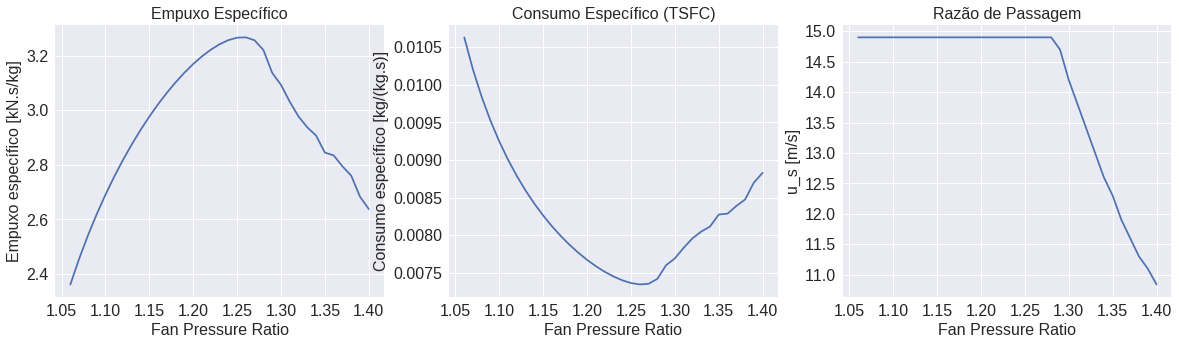

In [93]:
fs = 16

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
# prf_limit = results_c2.T['u_s'].dropna().idxmin()

plt.sca(ax[0])
# plt.plot(results_c2.loc['specific_thrust',:])
plt.plot(PRF, FS)
plt.title('Empuxo Específico',fontsize=fs)
plt.xlabel('Fan Pressure Ratio',fontsize=fs)
plt.ylabel('Empuxo específico [kN.s/kg]',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
# plt.vlines(x=prf_limit, ymin=0.98, ymax=1.28, linestyles='--')

plt.sca(ax[1])
# plt.plot(results_c2.loc['TSFC',:])
plt.plot(PRF, TSFC)
plt.title('Consumo Específico (TSFC)',fontsize=fs)
plt.xlabel('Fan Pressure Ratio',fontsize=fs)
plt.ylabel('Consumo específico [kg/(kg.s)]',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
# plt.vlines(x=prf_limit, ymin=0.018, ymax=0.024, linestyles='--')

plt.sca(ax[2])
# plt.plot(results_c2.loc['u_s',:])
plt.plot(PRF, BPR)
plt.title('Razão de Passagem',fontsize=fs)
plt.xlabel('Fan Pressure Ratio',fontsize=fs)
plt.ylabel('u_s [m/s]',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
# plt.hlines(y=1000, xmin=0, xmax=1.4, linestyles='--')
plt.savefig("images/questao2/fig2c1.jpg", dpi=1000)

print(f"Fan Pressure Ratio máximo: {max(PRF):0.2f}")